In [1]:
import pandas as pd
import numpy as np

In [4]:
# Load all MovieLens datasets from /mnt/data/
movies = pd.read_csv(r"D:\movie\movies.csv")
ratings = pd.read_csv(r"D:\movie\ratings.csv")
tags = pd.read_csv(r"D:\movie\tags.csv")
links = pd.read_csv(r"D:\movie\links.csv")


In [8]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.shape, ratings.shape, tags.shape, links.shape


((9742, 3), (100836, 4), (3683, 4), (9742, 3))

In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [12]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [15]:
print(movies.isnull().sum())
print(ratings.isnull().sum())
print(tags.isnull().sum()) 
print(links.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
movieId    0
imdbId     0
tmdbId     8
dtype: int64


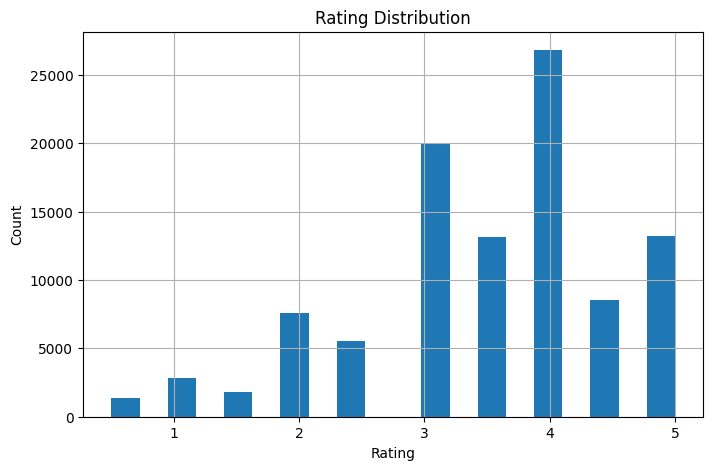

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
ratings['rating'].hist(bins=20)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution")
plt.show()


In [17]:
rating_counts = ratings.groupby('movieId').size().sort_values(ascending=False)
rating_counts.head(10)


movieId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
dtype: int64

In [18]:
movie_ratings = ratings.merge(movies, on='movieId')
movie_ratings.head()


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [19]:
avg_ratings = movie_ratings.groupby('title')['rating'].mean()
avg_ratings.head()


title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [20]:
movie_summary = movie_ratings.groupby('title').agg({
    'rating': ['mean', 'count']
})

movie_summary.columns = ['avg_rating', 'rating_count']
movie_summary.sort_values(by='rating_count', ascending=False).head(10)


,avg_rating,rating_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [21]:
popular_top_movies = movie_summary[movie_summary['rating_count'] >= 100]
popular_top_movies.sort_values(by='avg_rating', ascending=False).head(10)


,avg_rating,rating_count
title,,
"Shawshank Redemption, The (1994)",4.429022,317
"Godfather, The (1972)",4.289062,192
Fight Club (1999),4.272936,218
"Godfather: Part II, The (1974)",4.259690,129
"Departed, The (2006)",4.252336,107
Goodfellas (1990),4.250000,126
Casablanca (1942),4.240000,100
"Dark Knight, The (2008)",4.238255,149
"Usual Suspects, The (1995)",4.237745,204


In [22]:
# Merge movies + ratings again (if not already done)
movie_ratings = ratings.merge(movies, on='movieId')

# Group by movie to get avg rating & rating count
popularity_df = movie_ratings.groupby('title').agg({
    'rating': ['mean', 'count']
})

# Rename columns
popularity_df.columns = ['avg_rating', 'rating_count']

# Sort by popularity (rating_count) and then by avg rating
popularity_df = popularity_df.sort_values(
    by=['rating_count', 'avg_rating'], 
    ascending=False
)

popularity_df.head(10)


,avg_rating,rating_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [23]:
def get_popular_movies(n=10, min_ratings=100):
    """
    Returns top N most popular movies (with minimum rating_count filter)
    """
    filtered = popularity_df[popularity_df['rating_count'] >= min_ratings]
    return filtered.head(n)


In [24]:
get_popular_movies(10)


,avg_rating,rating_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [26]:
movies['genres'] = movies['genres'].replace('(no genres listed)', '')
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [27]:
# Create TF-IDF matrix for genres
tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(movies['genres'])

tfidf_matrix.shape


(9742, 21)

In [28]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim.shape


(9742, 9742)

In [29]:
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()


In [30]:
def recommend_movies(title, n=10):
    """
    Recommend top n movies based on cosine similarity of TF-IDF (genres)
    """
    if title not in indices:
        return f"'{title}' not found. Check spelling."

    idx = indices[title]

    # Get similarity scores for this movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort by similarity score (high → low)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Skip the first one (the movie itself)
    sim_scores = sim_scores[1:n+1]

    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return movie titles
    return movies['title'].iloc[movie_indices]


In [31]:
recommend_movies("Toy Story (1995)")


1706                                          Antz (1998)
2355                                   Toy Story 2 (1999)
2809       Adventures of Rocky and Bullwinkle, The (2000)
3000                     Emperor's New Groove, The (2000)
3568                                Monsters, Inc. (2001)
6194                                     Wild, The (2006)
6486                               Shrek the Third (2007)
6948                       Tale of Despereaux, The (2008)
7760    Asterix and the Vikings (Astérix et les Viking...
8219                                         Turbo (2013)
Name: title, dtype: object

In [32]:
# We already loaded tags earlier, but load if needed:
# tags = pd.read_csv("/mnt/data/tags.csv")

tags.head()


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [33]:
# Group tags by movieId and combine into a single string
tags_grouped = tags.groupby('movieId')['tag'].apply(lambda x: " ".join(x))

# Turn into DataFrame for merging
tags_grouped = tags_grouped.reset_index()
tags_grouped.head()


,movieId,tag
0,1,pixar pixar fun
1,2,fantasy magic board game Robin Williams game
2,3,moldy old
3,5,pregnancy remake
4,7,remake


In [34]:
movies_tags = movies.merge(tags_grouped, on='movieId', how='left')


In [35]:
movies_tags['tag'] = movies_tags['tag'].fillna("")


In [36]:
movies_tags['combined_text'] = movies_tags['genres'] + " " + movies_tags['tag']
movies_tags[['title', 'combined_text']].head()


,title,combined_text
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy pi...
1,Jumanji (1995),Adventure|Children|Fantasy fantasy magic board...
2,Grumpier Old Men (1995),Comedy|Romance moldy old
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy pregnancy remake


In [37]:
tfidf2 = TfidfVectorizer(stop_words='english')

tfidf_matrix2 = tfidf2.fit_transform(movies_tags['combined_text'])

tfidf_matrix2.shape


(9742, 1675)

In [38]:
cosine_sim2 = cosine_similarity(tfidf_matrix2, tfidf_matrix2)


In [39]:
indices2 = pd.Series(movies_tags.index, index=movies_tags['title']).drop_duplicates()


In [47]:
movies_tags.loc[movies_tags['title'] == "Matrix, The (1999)", 'title'].values


array(['Matrix, The (1999)'], dtype=object)

In [51]:
def recommend_movies_tags(title, n=10):
    # Fix title automatically
    real_title = find_closest_title(title)
    if real_title is None:
        return f"Movie '{title}' not found."

    idx = indices2[real_title]

    sim_scores = list(enumerate(cosine_sim2[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]

    movie_indices = [i[0] for i in sim_scores]

    return movies_tags['title'].iloc[movie_indices]


In [48]:
movies_tags['title'] == "Matrix,The (1999)"


0       False
1       False
2       False
3       False
4       False
        ...  
9737    False
9738    False
9739    False
9740    False
9741    False
Name: title, Length: 9742, dtype: bool

In [49]:
movies_tags[movies_tags['title'].str.contains("Matrix", case=False, na=False)][['movieId','title']]


,movieId,title
1939,2571,"Matrix, The (1999)"
4351,6365,"Matrix Reloaded, The (2003)"
4639,6934,"Matrix Revolutions, The (2003)"
5669,27660,"Animatrix, The (2003)"


In [50]:
from difflib import get_close_matches

def find_closest_title(query):
    titles = movies_tags['title'].tolist()
    match = get_close_matches(query, titles, n=1, cutoff=0.5)
    return match[0] if match else None


In [52]:
recommend_movies_tags("The Matrix")
recommend_movies_tags("Matrix")
recommend_movies_tags("matrix 1999")
recommend_movies_tags("Matrix, The (1999)")


5202                                    Jetée, La (1962)
1265                                Sliding Doors (1998)
5390    House of Flying Daggers (Shi mian mai fu) (2004)
1820                              Karate Kid, The (1984)
1821                     Karate Kid, Part II, The (1986)
4764                            Hero (Ying xiong) (2002)
1822                    Karate Kid, Part III, The (1989)
4615                            Kill Bill: Vol. 1 (2003)
1293                                 Postman, The (1997)
59             Lawnmower Man 2: Beyond Cyberspace (1996)
Name: title, dtype: object

In [53]:
from sklearn.preprocessing import MinMaxScaler

# Popularity data already created earlier
pop_df = popularity_df.copy()

scaler = MinMaxScaler()
pop_df['popularity_norm'] = scaler.fit_transform(pop_df[['rating_count']])

pop_df.head()


,avg_rating,rating_count,popularity_norm
title,,,
Forrest Gump (1994),4.164134,329,1.000000
"Shawshank Redemption, The (1994)",4.429022,317,0.963415
Pulp Fiction (1994),4.197068,307,0.932927
"Silence of the Lambs, The (1991)",4.161290,279,0.847561
"Matrix, The (1999)",4.192446,278,0.844512


In [54]:
# Merge normalized popularity back into movies_tags
movies_tags_pop = movies_tags.merge(pop_df[['popularity_norm']], 
                                    left_on='title', 
                                    right_index=True, 
                                    how='left')

movies_tags_pop['popularity_norm'] = movies_tags_pop['popularity_norm'].fillna(0)
movies_tags_pop.head()



,movieId,title,genres,tag,combined_text,popularity_norm
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar pixar fun,Adventure|Animation|Children|Comedy|Fantasy pi...,0.652439
1,2,Jumanji (1995),Adventure|Children|Fantasy,fantasy magic board game Robin Williams game,Adventure|Children|Fantasy fantasy magic board...,0.332317
2,3,Grumpier Old Men (1995),Comedy|Romance,moldy old,Comedy|Romance moldy old,0.155488
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,,Comedy|Drama|Romance,0.018293
4,5,Father of the Bride Part II (1995),Comedy,pregnancy remake,Comedy pregnancy remake,0.146341


In [60]:
from difflib import get_close_matches

def find_closest_title(query):
    titles = movies_tags['title'].tolist()
    match = get_close_matches(query, titles, n=1, cutoff=0.5)
    return match[0] if match else None


In [61]:
def hybrid_recommend(title, n=10, alpha=0.7):
    # Get the closest matching movie title
    real_title = find_closest_title(title)
    if real_title is None:
        return f"Movie '{title}' not found."

    # Get index of the movie in the TF-IDF matrix
    idx = indices2[real_title]

    hybrid_scores = []

    # Loop through all movies
    for i, sim in enumerate(cosine_sim2[idx]):
        popularity_norm = movies_tags_pop.iloc[i]['popularity_norm']
        score = alpha * sim + (1 - alpha) * popularity_norm
        hybrid_scores.append((i, score))

    # Sort by score descending
    hybrid_scores = sorted(hybrid_scores, key=lambda x: x[1], reverse=True)

    # Skip first entry (the movie itself)
    hybrid_scores = hybrid_scores[1:n+1]

    # Extract movie indices
    movie_indices = [i[0] for i in hybrid_scores]

    return movies_tags_pop['title'].iloc[movie_indices]


In [62]:
hybrid_recommend("The Matrix")


2596    Close Encounters of the Third Kind (1977)
176                             Waterworld (1995)
1158                    Fifth Element, The (1997)
6743                              Iron Man (2008)
1054         Star Trek: The Motion Picture (1979)
385                         Demolition Man (1993)
1187                               Contact (1997)
777           20,000 Leagues Under the Sea (1954)
1496                                  Dune (1984)
3414                    Planet of the Apes (2001)
Name: title, dtype: object